<a href="https://colab.research.google.com/github/ac-26/CSI-25/blob/main/week4_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Week-2 Assignment -> Conduct an in-depth Exploratory Data Analysis on a complex dataset. Focus on understanding data distributions, identifying missing values, detecting outliers, and uncovering relationships between variables. Utilize visualizations like histograms, box plots, and heatmaps to support your findings.**

### **By -> Arnav Chopra**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [122]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('default')
sns.set_palette("husl")

In [123]:
data = sns.load_dataset('titanic')

In [124]:
data.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [125]:
data.shape

(891, 15)

In [126]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [128]:

data['survived'].unique()

array([0, 1])

In [129]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [130]:
for col in data.columns:
    print(col, data[col].unique())
    print()

survived [0 1]

pclass [3 1 2]

sex ['male' 'female']

age [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

sibsp [1 0 3 4 2 5 8]

parch [0 1 2 5 3 4 6]

fare [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.687

### **Removing NULL values and data cleaning**

### **Working on age column**

In [131]:
# Here i see many discrepencies ->
# 1. The age data is in float and values have decimals (like 0.5) so i will take upperbound of all values to get whole number
# 2. Will also change all values to integer after that

In [132]:
# One thing that i also notice are small decimals like (0.42, 0.67, 0.75, 0.83, 0.92)
# now these can also be adult ages mistyped like 42 or 67 but also baby ages such as a 5 month old baby
# i will check and then do the necessary changes
age_less_than1 = data[data['age'] < 1]
age_less_than1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False


In [133]:
#clearly these are all child ages!! just saved from a huge mistake
#will round off all these ages to ceil values
data['age'] = data['age'].apply(lambda x: int(math.ceil(x)) if pd.notna(x) else x)
data['age'] = data['age'].astype('Int64')

### **Handling null values**

In [134]:
data['age'].isnull().sum()

np.int64(177)

In [135]:
data['age'] = data['age'].fillna(30)
data['age'] = data['age'].astype(int)

In [136]:
data['age'].unique()

array([22, 38, 26, 35, 30, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17,
       32, 16, 25,  1, 33, 23, 24, 46, 59, 71, 37, 47, 12,  9, 51, 56, 41,
       44, 61, 50, 36, 62, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80, 70,
        6, 74])

In [137]:
data[data['deck'] == 'B'].embarked.mode()

,embarked
0,S


In [138]:
data['embarked'] = data['embarked'].fillna('S')
data['embark_town'] = data['embark_town'].fillna('Southampton')

### **Deck column has many null values, analysing the deck column in more detail**

In [139]:
deck_data = data[data['deck'].notna()].copy()

In [140]:
deck_pclass = pd.crosstab(deck_data['deck'], deck_data['pclass'])
deck_pclass

pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4


In [141]:
fare_by_deck = deck_data.groupby('deck')['fare'].agg(['mean', 'median', 'count']).round(2)
print(fare_by_deck.sort_values('mean', ascending=False))

        mean  median  count
deck                       
B     113.51   80.00     47
C     100.15   83.48     59
D      57.24   53.10     33
E      46.03   45.18     32
A      39.62   35.50     15
F      18.70   13.00     13
G      13.58   13.58      4


### **There is a clear correlation between deck level, class and price of ticket, higher decks = higher fares = high class passengers**

In [142]:
# So we cant fill in missing values randomly we will have to relate it with class so we apply
#iterative imputer it will automatically consider many vadiables and fill null values
features_for_imputation = ['pclass', 'fare', 'age', 'deck']
impute_data = data[features_for_imputation].copy()

le_deck = LabelEncoder()
deck_known = impute_data['deck'].dropna()
le_deck.fit(deck_known)

impute_data['deck_encoded'] = impute_data['deck'].map(
    {deck: i for i, deck in enumerate(le_deck.classes_)}
)

imputer = IterativeImputer(random_state=42, max_iter=10)
imputed_data = imputer.fit_transform(impute_data[['pclass', 'fare', 'age', 'deck_encoded']])

imputed_deck_encoded = np.round(imputed_data[:, 3]).astype(int)
deck_mapping = {i: deck for i, deck in enumerate(le_deck.classes_)}
data['deck'] = [deck_mapping[i] for i in imputed_deck_encoded]

In [143]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


### **Now as null values have been removed we move to EDA**

### **Visualizing Individual Columns**

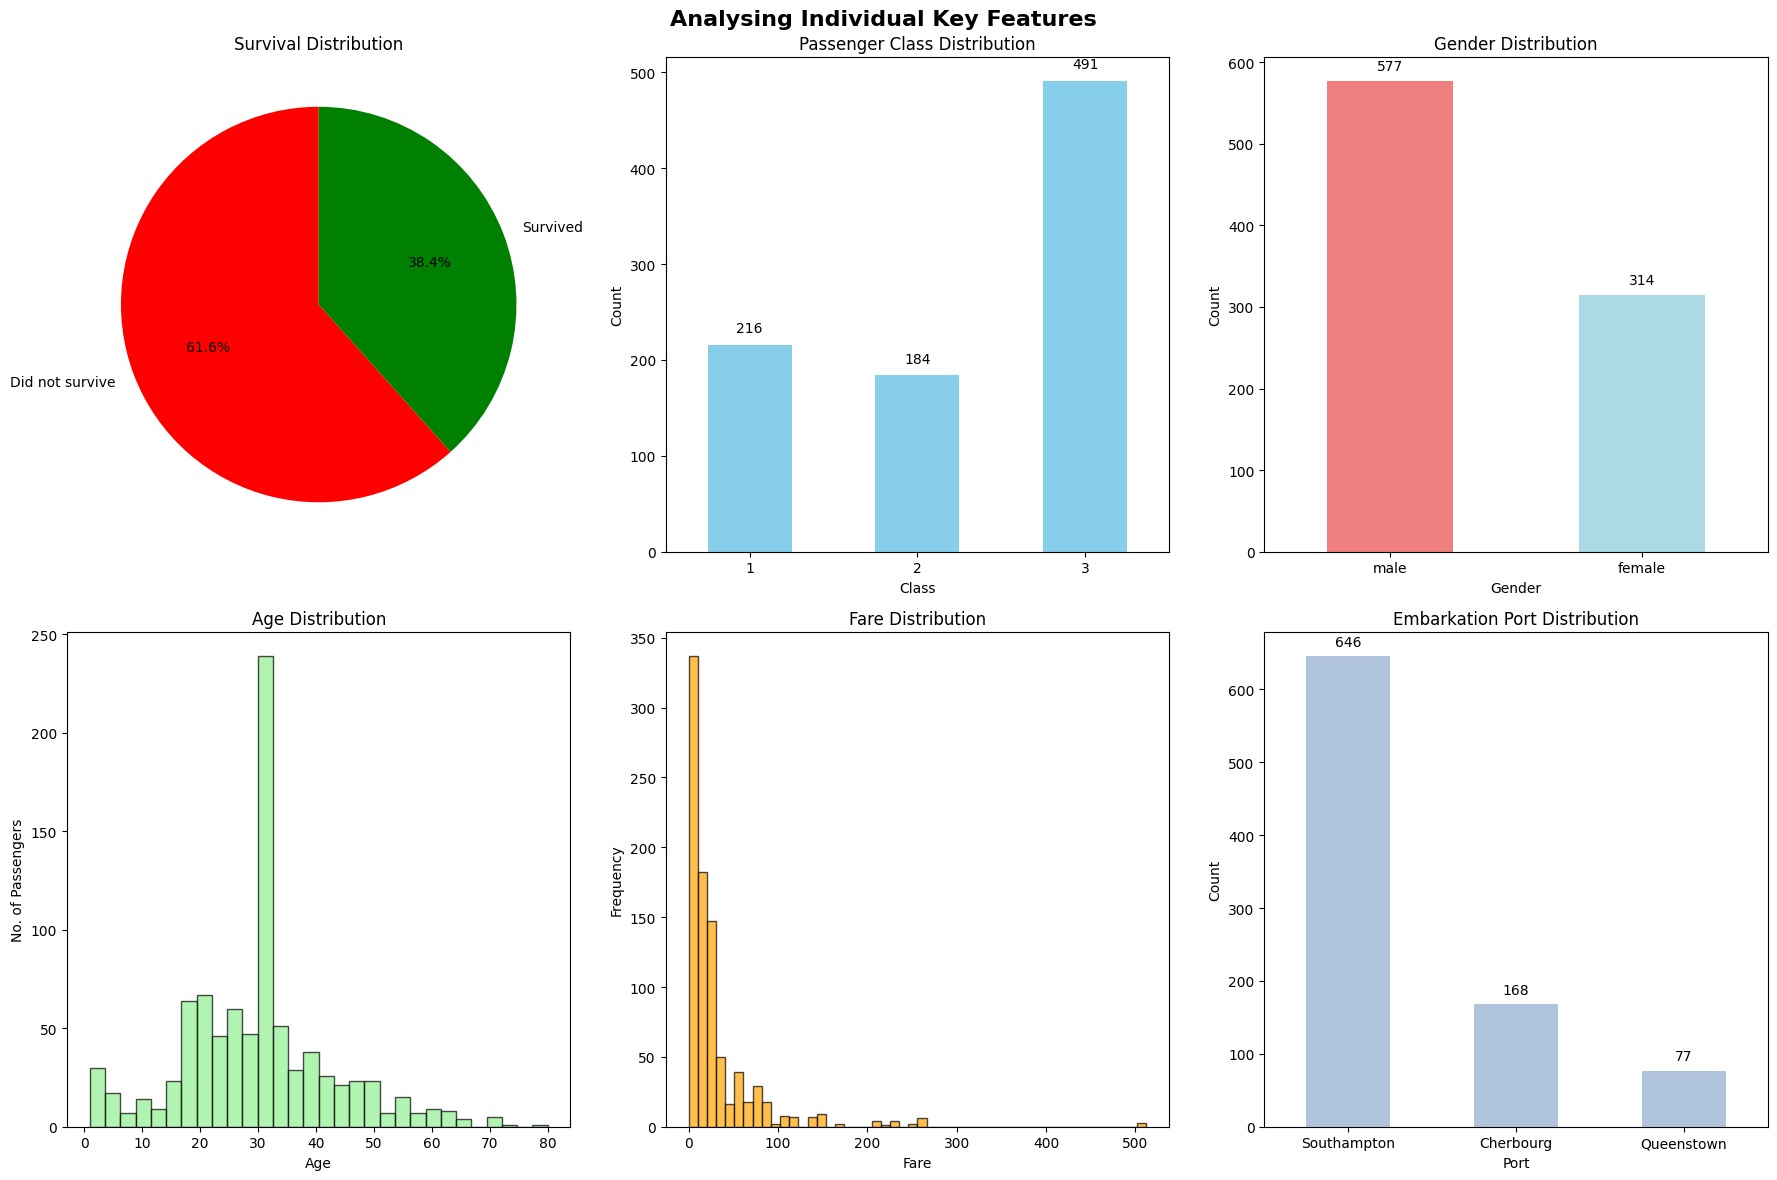

In [144]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Analysing Individual Key Features', fontsize=16, fontweight='bold')

#survival column
axes[0,0].pie(data['survived'].value_counts(), labels=['Did not survive', 'Survived'],
              autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axes[0,0].set_title('Survival Distribution')

#passenger class column
pclass_counts = data['pclass'].value_counts().sort_index()
bars2 = pclass_counts.plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Passenger Class Distribution')
axes[0,1].set_xlabel('Class')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=0)
#will also show values above each bar for ease in understanding
for i, v in enumerate(pclass_counts.values):
    axes[0,1].text(i, v + 10, str(v), ha='center', va='bottom')

#sex column
sex_counts = data['sex'].value_counts()
bars3 = sex_counts.plot(kind='bar', ax=axes[0,2], color=['lightcoral', 'lightblue'])
axes[0,2].set_title('Gender Distribution')
axes[0,2].set_xlabel('Gender')
axes[0,2].set_ylabel('Count')
axes[0,2].tick_params(axis='x', rotation=0)
for i, v in enumerate(sex_counts.values):
    axes[0,2].text(i, v + 10, str(v), ha='center', va='bottom')

#age column
axes[1,0].hist(data['age'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('No. of Passengers')

#fare column
axes[1,1].hist(data['fare'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')

#embarkation point column
embarked_counts = data['embark_town'].value_counts()
bars6 = embarked_counts.plot(kind='bar', ax=axes[1,2], color='lightsteelblue')
axes[1,2].set_title('Embarkation Port Distribution')
axes[1,2].set_xlabel('Port')
axes[1,2].set_ylabel('Count')
axes[1,2].tick_params(axis='x', rotation=0)
for i, v in enumerate(embarked_counts.values):
    axes[1,2].text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **Bivariate Analysis**

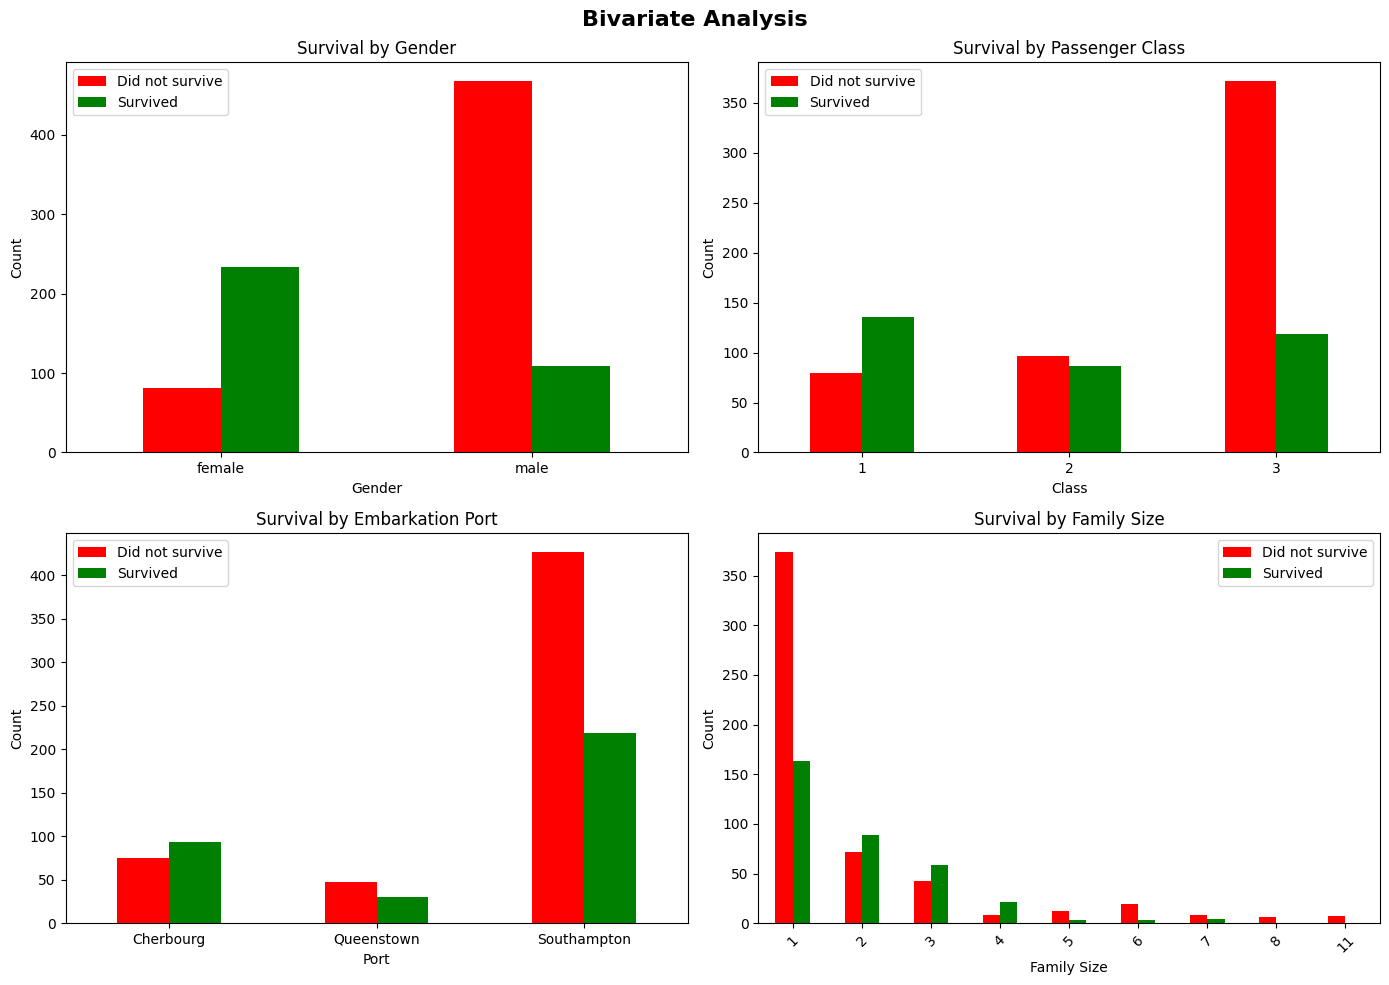

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bivariate Analysis', fontsize=16, fontweight='bold')

#survival with gender
survival_gender = pd.crosstab(data['sex'], data['survived'])
survival_gender.plot(kind='bar', ax=axes[0,0], color=['red', 'green'])
axes[0,0].set_title('Survival by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=0)
axes[0,0].legend(['Did not survive', 'Survived'])

#survival with class
survival_class = pd.crosstab(data['pclass'], data['survived'])
survival_class.plot(kind='bar', ax=axes[0,1], color=['red', 'green'])
axes[0,1].set_title('Survival by Passenger Class')
axes[0,1].set_xlabel('Class')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(['Did not survive', 'Survived'])

#survival with embarkation point
survival_embarked = pd.crosstab(data['embark_town'], data['survived'])
survival_embarked.plot(kind='bar', ax=axes[1,0], color=['red', 'green'])
axes[1,0].set_title('Survival by Embarkation Port')
axes[1,0].set_xlabel('Port')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=0)
axes[1,0].legend(['Did not survive', 'Survived'])

#basic feature engineering
#i will combine 3 columns together and create a new feature as family size (siblings + parents + self) and analyze survival with it
data['family_size'] = data['sibsp'] + data['parch'] + 1
survival_family = pd.crosstab(data['family_size'], data['survived'])
survival_family.plot(kind='bar', ax=axes[1,1], color=['red', 'green'])
axes[1,1].set_title('Survival by Family Size')
axes[1,1].set_xlabel('Family Size')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

In [146]:
print("Survival by Gender: \n", survival_gender)
print("=" * 60)
print("\nSurvival by Passenger Class: \n", survival_class)
print("=" * 60)
print("\nSurvival by Embarkation Port: \n", survival_embarked)
print("=" * 60)
print("\nSurvival by Family Size: \n", survival_family)

Survival by Gender: 
 survived    0    1
sex               
female     81  233
male      468  109

Survival by Passenger Class: 
 survived    0    1
pclass            
1          80  136
2          97   87
3         372  119

Survival by Embarkation Port: 
 survived       0    1
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219

Survival by Family Size: 
 survived       0    1
family_size          
1            374  163
2             72   89
3             43   59
4              8   21
5             12    3
6             19    3
7              8    4
8              6    0
11             7    0


In [147]:
print("\nSurvival Rates by Columns:")
print("-" * 60)
print("By Gender:")
gender_survival = data.groupby('sex')['survived'].mean()
for gender, rate in gender_survival.items():
    print(f"  {gender}: {rate:.1%}")
print("-" * 60)
print("By Class:")
class_survival = data.groupby('pclass')['survived'].mean()
for pclass, rate in class_survival.items():
    print(f"  Class {pclass}: {rate:.1%}")
print("-" * 60)
print("By Embarkation Port:")
embarked_survival = data.groupby('embark_town')['survived'].mean()
for port, rate in embarked_survival.items():
    print(f"  {port}: {rate:.1%}")


Survival Rates by Columns:
------------------------------------------------------------
By Gender:
  female: 74.2%
  male: 18.9%
------------------------------------------------------------
By Class:
  Class 1: 63.0%
  Class 2: 47.3%
  Class 3: 24.2%
------------------------------------------------------------
By Embarkation Port:
  Cherbourg: 55.4%
  Queenstown: 39.0%
  Southampton: 33.9%


### **Multivariate Analysis**

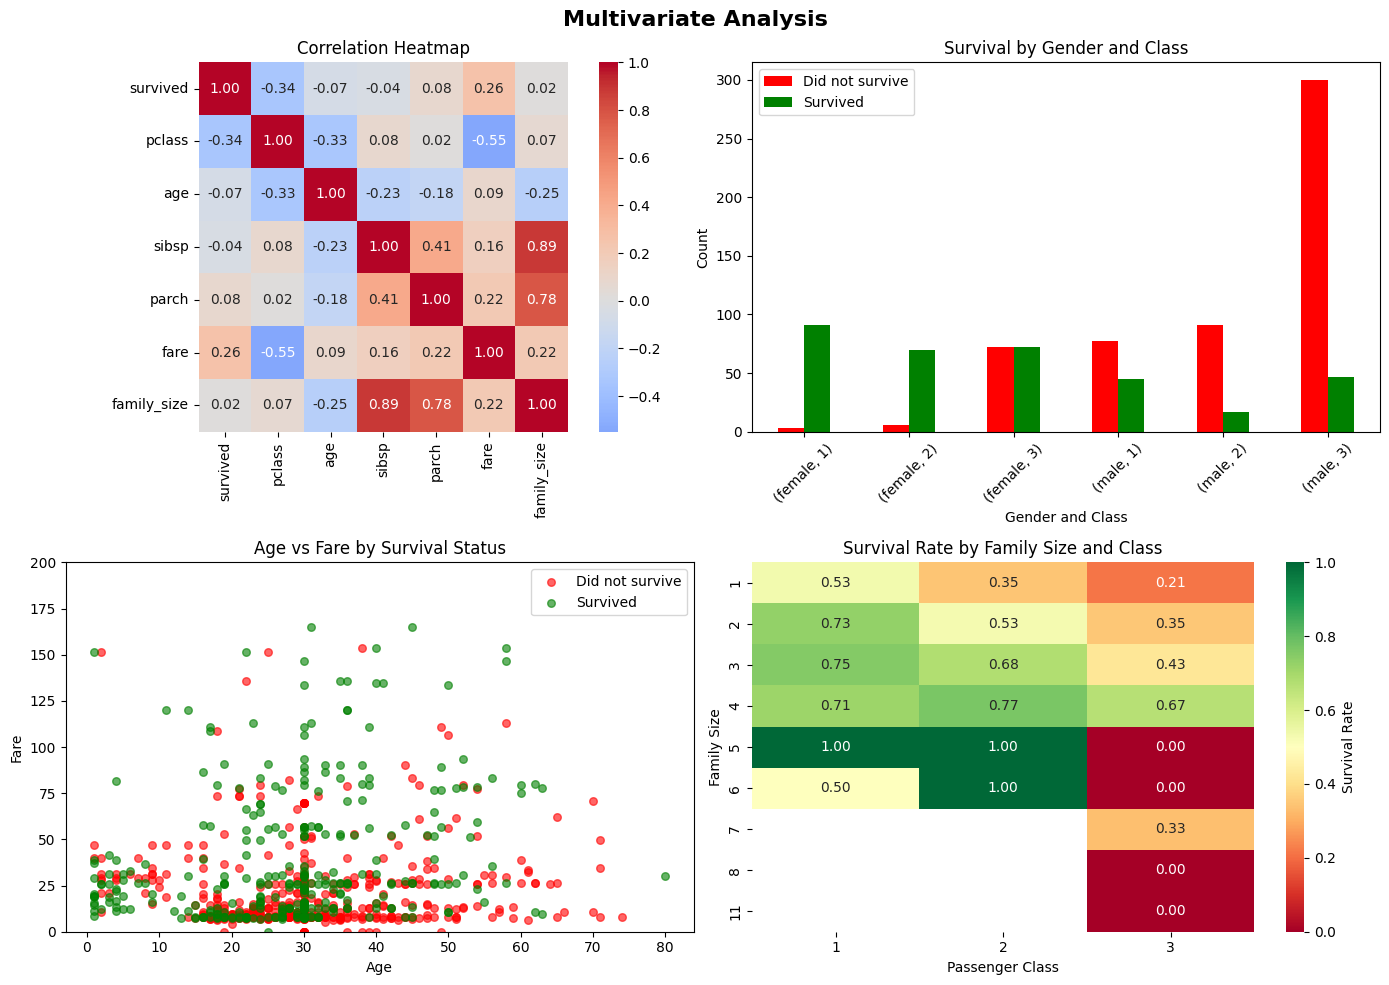

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Multivariate Analysis', fontsize=16, fontweight='bold')

#correlation between features
numerical_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size']
correlation_matrix = data[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            ax=axes[0,0], square=True, fmt='.2f')
axes[0,0].set_title('Correlation Heatmap')

#survival by gender and class
survival_gender_class = pd.crosstab([data['sex'], data['pclass']], data['survived'])
survival_gender_class.plot(kind='bar', ax=axes[0,1], color=['red', 'green'])
axes[0,1].set_title('Survival by Gender and Class')
axes[0,1].set_xlabel('Gender and Class')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(['Did not survive', 'Survived'])


#survival by age and fare
survivors = data[data['survived'] == 1]
non_survivors = data[data['survived'] == 0]

axes[1,0].scatter(non_survivors['age'], non_survivors['fare'],
                  alpha=0.6, c='red', label='Did not survive', s=30)
axes[1,0].scatter(survivors['age'], survivors['fare'],
                  alpha=0.6, c='green', label='Survived', s=30)
axes[1,0].set_title('Age vs Fare by Survival Status')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Fare')
axes[1,0].set_ylim(0, 200)
axes[1,0].legend()

#surviaval vy family size and class
survival_rates = data.groupby(['family_size', 'pclass'])['survived'].mean().reset_index()
pivot_survival = survival_rates.pivot(index='family_size', columns='pclass', values='survived')

sns.heatmap(pivot_survival, annot=True, cmap='RdYlGn', ax=axes[1,1],
            fmt='.2f', cbar_kws={'label': 'Survival Rate'})
axes[1,1].set_title('Survival Rate by Family Size and Class')
axes[1,1].set_xlabel('Passenger Class')
axes[1,1].set_ylabel('Family Size')

plt.tight_layout()
plt.show()

### **Outlier Analsyis**

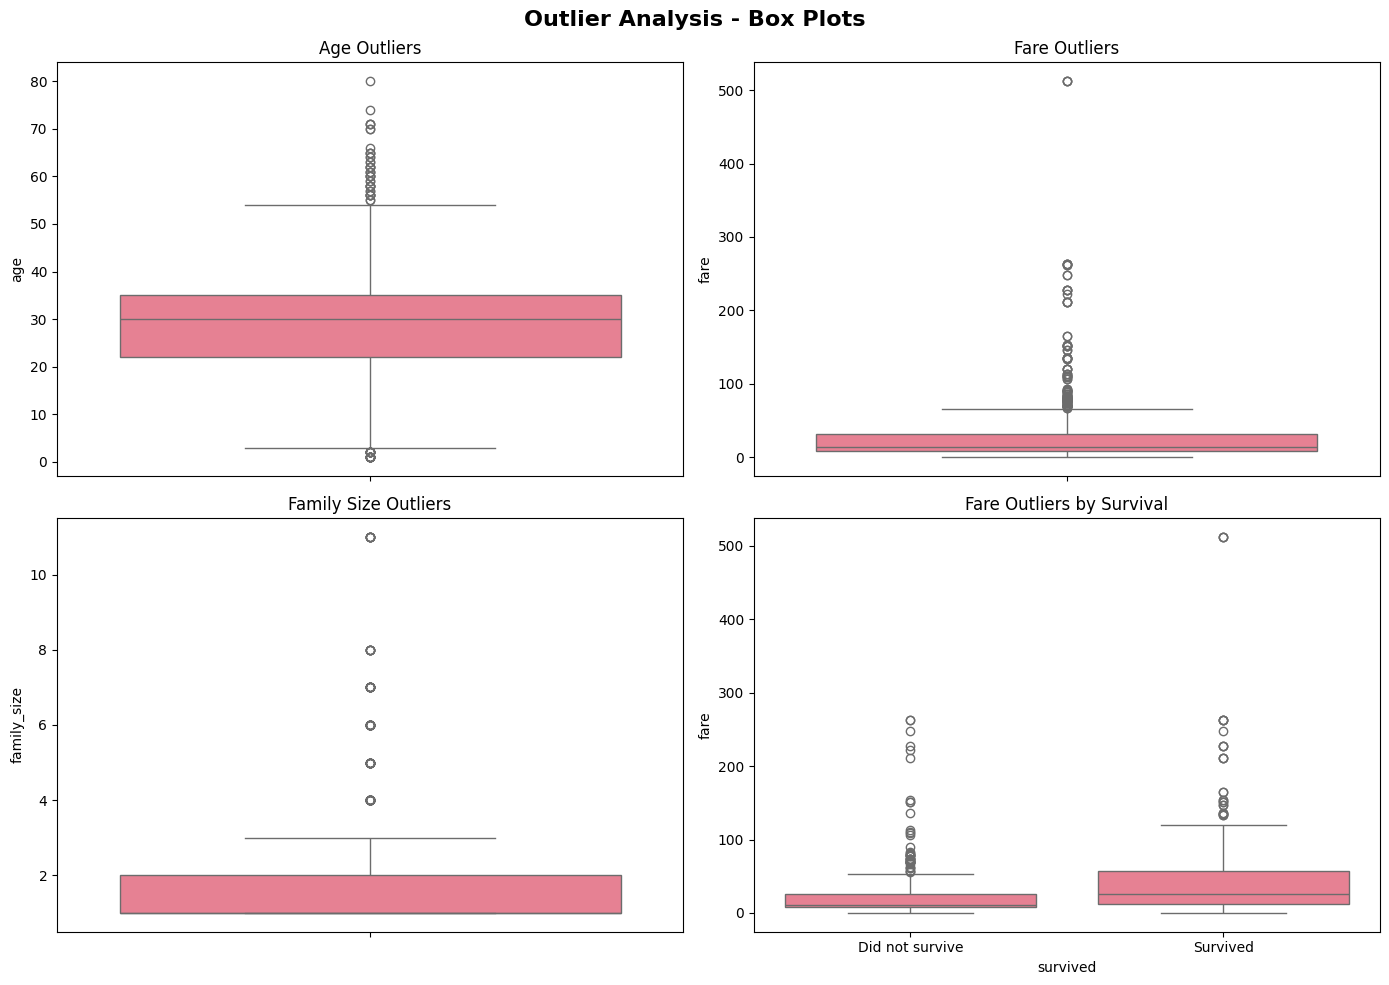

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Outlier Analysis - Box Plots', fontsize=16, fontweight='bold')

# Create box plots using seaborn
sns.boxplot(data=data, y='age', ax=axes[0,0])
axes[0,0].set_title('Age Outliers')

sns.boxplot(data=data, y='fare', ax=axes[0,1])
axes[0,1].set_title('Fare Outliers')

sns.boxplot(data=data, y='family_size', ax=axes[1,0])
axes[1,0].set_title('Family Size Outliers')

# Fare outliers by survival
sns.boxplot(data=data, x='survived', y='fare', ax=axes[1,1])
axes[1,1].set_title('Fare Outliers by Survival')
axes[1,1].set_xticklabels(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

## **My Final Analysis:**

*   The overall survival rate was 38.4% with various differences and patterns accross features
*   There were various missing values in columns like deck and age. All such discrepencies have been handled.
*   Female passengers demonstrated significantly higher survival rates (74.2%) compared to males (18.9%), teling that women and children were evacuaed first
*   Passenger class strongly correlates with survival outcomes. First-class passengers achieved 63.0% survival, second-class 47.3%, and third-class only 24.2%. This pattern says that those who paid more or were from "higher class" had better access to life boats or were evacuated on priority
*   Children showed the high survival rates followed by adults and Senior passengers (60+) had the lowest survival, this can be due to physical strength during evacuation
*   Passengers traveling with moderate-sized families (2-4 members) had optimal survival rates. Solo travelers achieved 30.4% survival, while very large families (8+ members) experienced significantly lower survival rates, suggesting coordination challenges during emergency evacuation
*   Strong positive correlation (0.257) exists between fare paid and survival probability.The highest fare (500 approx) was paid by a first-class passenger who survived, while many third-class passengers paid minimal fares and had poor survival outcomes.


### **Outlier Analysis**

The analysis identified several significant outliers:
- Age: Elderly passengers (65-80 years) and very young children (under 2 years)
- Fare: Luxury passengers paying 200-500, with one extreme case of 512
- Family Size: Large families with 8-11 members, representing complex evacuation scenarios


### **Conclusion:**

The Titanic disaster demonstrates clear survival disparities based on:
1. Gender: Women and children first protocol significantly favored female passengers
2. Socioeconomic Status: Wealth provided better access to safety resources
3. Age: Children received priority, while elderly faced evacuation challenges
4. Family Dynamics: Moderate family sizes balanced support with coordination efficiency **(was able to achieve this insight by feature engineering)**













